In [51]:
import numpy as np                  # Mathetimatical Operations
import pandas as pd                 # Data manipulation

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt     
%matplotlib inline

# Sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, classification_report, mean_squared_error, confusion_matrix, f1_score, precision_recall_curve, r2_score 
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

# Scipy
from scipy.stats import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats

# XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb

In [52]:

df = pd.read_csv('dataset.csv')

In [53]:
print('Total number of observations in the dataset are:',df.shape[0])

Total number of observations in the dataset are: 1200890


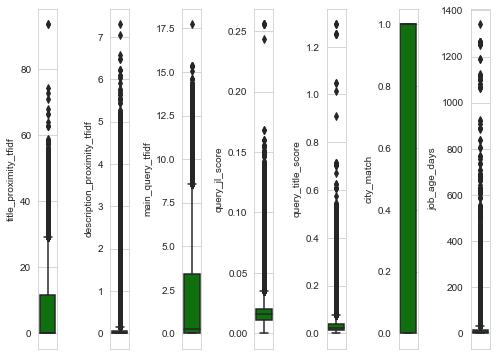

In [54]:
l = ['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score',
       'city_match', 'job_age_days']
number_of_columns=7
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


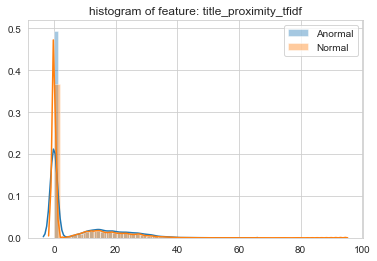

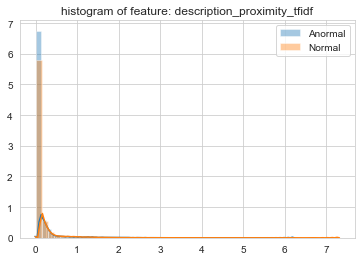

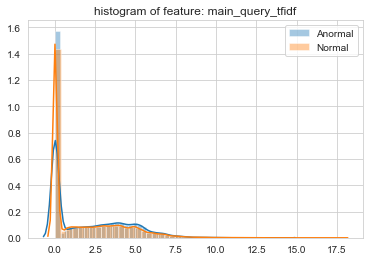

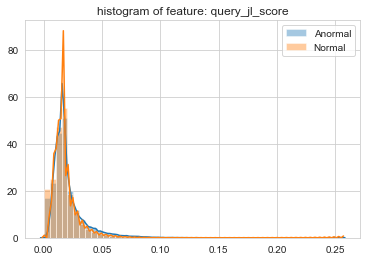

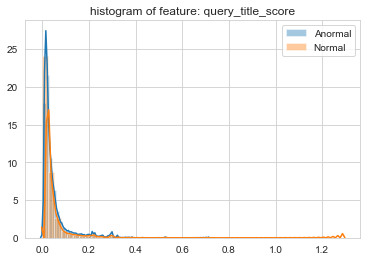

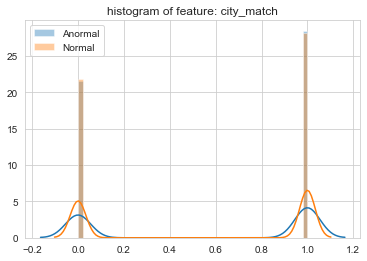

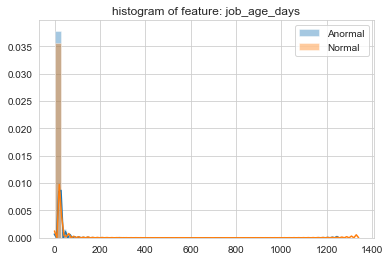

/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


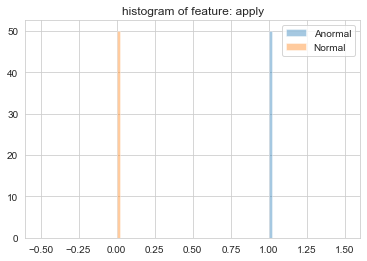

In [55]:
for feature in df.columns[:-2]:
    ax = plt.subplot()
    sns.distplot(df[df['apply'] == 1][feature], bins=50, label='Anormal')
    sns.distplot(df[df['apply'] == 0][feature], bins=50, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

In [56]:
print(df.shape)
df = df.drop_duplicates(keep = 'first')
df.shape

(1200890, 10)


(1114759, 10)

In [57]:
df.isnull().sum()

title_proximity_tfidf          212030
description_proximity_tfidf    212030
main_query_tfidf                    0
query_jl_score                      0
query_title_score                   0
city_match                     243469
job_age_days                        0
apply                               0
search_date_pacific                 0
class_id                            0
dtype: int64

In [58]:

df['main_title_tfidf'] = df['title_proximity_tfidf']*df['main_query_tfidf']

In [59]:
df = df.drop(['title_proximity_tfidf','main_query_tfidf'], axis=1)

In [60]:
train = df.loc[df['search_date_pacific']<'2018-01-27']
test = df.loc[df['search_date_pacific'] == '2018-01-27']


In [61]:
# Drop the unnecessary columns
train.drop(['search_date_pacific','class_id'],axis=1,inplace = True)
test.drop(['search_date_pacific','class_id'],axis=1,inplace = True)

/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
# Drop irrelevant features
df = df.drop(['search_date_pacific','class_id'],axis=1)

In [63]:
# Reset the index
X = X.reset_index(drop='index')
y = y.reset_index(drop='index')

In [64]:

X_train = train.drop(['apply'],axis=1)
y_train = train['apply']
X_test = test.drop(['apply'],axis=1)
y_test = test['apply']

In [65]:
df.head(n=10)

,description_proximity_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,main_title_tfidf
0,0.000000,0.004824,0.006628,0.0,5.0,0,0.000000
1,0.043637,0.011935,0.011208,0.0,5.0,0,30.006660
2,0.043637,0.011935,0.011208,0.0,5.0,1,30.006660
3,0.000000,0.013046,0.033340,0.0,5.0,0,0.000000
4,NaN,0.008065,0.008772,0.0,7.0,0,NaN
5,0.198377,0.022545,0.014706,1.0,16.0,0,0.000000
6,NaN,0.005782,0.000003,NaN,0.0,0,NaN
8,0.118237,0.017337,0.050844,0.0,23.0,0,41.526752
9,0.000000,0.019160,0.018750,1.0,0.0,0,0.000000
10,NaN,0.016849,0.020427,1.0,1.0,0,NaN


In [66]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [67]:
clean_dataset(df)

,description_proximity_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,main_title_tfidf
0,0.000000,0.004824,0.006628,0.0,5.0,0.0,0.000000
1,0.043637,0.011935,0.011208,0.0,5.0,0.0,30.006660
2,0.043637,0.011935,0.011208,0.0,5.0,1.0,30.006660
3,0.000000,0.013046,0.033340,0.0,5.0,0.0,0.000000
5,0.198377,0.022545,0.014706,1.0,16.0,0.0,0.000000
...,...,...,...,...,...,...,...
1200881,0.000000,0.000001,0.015415,1.0,7.0,0.0,0.000000
1200883,0.032371,0.025312,0.024012,0.0,10.0,0.0,89.457534
1200885,0.041629,0.013398,0.054904,1.0,14.0,0.0,80.192559
1200886,0.000000,0.019855,0.023041,0.0,15.0,0.0,0.000000


In [68]:
from sklearn.model_selection import train_test_split

X=df[['main_title_tfidf', 'description_proximity_tfidf', 'query_jl_score', 'query_title_score', 'city_match', 'job_age_days']] 
y=df['apply']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
print(X_train.shape)

(546449, 6)


In [70]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [79]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8402714236566066


In [84]:
from sklearn.externals import joblib
joblib.dump(clf,'random_forest.pkl')
clf_from_joblib = joblib.load('random_forest.pkl')  
pickle_pred = clf_from_joblib.predict(X_test)

/Users/rishigarg/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, pickle_pred))

Accuracy: 0.8402714236566066


In [6]:
from __future__ import division
import math

def TermFrequency(document, matchingTerm):
    terms = document.lower().split()
    term_in_document = terms.count(matchingTerm.lower())
    len_of_document = float(len(terms))
    normalized_tf = term_in_document / len_of_document
    return normalized_tf

def InverseDocumentFrequency(documents, matchingTerm):
    num_docs_with_given_term = 0 
    for document in documents:
        terms = document.lower().split()
        if matchingTerm in terms:
            num_docs_with_given_term+=1
    if num_docs_with_given_term > 0:
        return math.log(len(documents)/num_docs_with_given_term)
    else:
        return 0


documents = {"We require a python developer who can write efficient code.",
             "Finding a Software Developer for my company min 3 years experience",
             "looking for a human resource people",
             "computer science engineer also fresher will be accepted"}

def TermFrequencyWithInverseDocumentFrequency(documents, matchingTerm):
    tf_idf = []
    idf = InverseDocumentFrequency(documents, matchingTerm)
    for document in documents:
        normalized_tf = TermFrequency(document, matchingTerm)
        tf_idf.append(normalized_tf * idf)
        print(document, tf_idf)
    print(tf_idf)

TermFrequencyWithInverseDocumentFrequency(documents, "developer")

computer science engineer also fresher will be accepted [0.0]
looking for a human resource people [0.0, 0.0]
Finding a Software Developer for my company min 3 years experience [0.0, 0.0, 0.06301338005090412]
We require a python developer who can write efficient code. [0.0, 0.0, 0.06301338005090412, 0.06931471805599453]
[0.0, 0.0, 0.06301338005090412, 0.06931471805599453]


Random Forest Algorithm

In [ ]:
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

In [ ]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

In [ ]:

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

In [ ]:
# Select the best split point for a dataset
def get_split(dataset, n_features):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	features = list()
	while len(features) < n_features:
		index = randrange(len(dataset[0])-1)
		if index not in features:
			features.append(index)
	for index in features:
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}


In [ ]:
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left, n_features)
		split(node['left'], max_depth, min_size, n_features, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right, n_features)
		split(node['right'], max_depth, min_size, n_features, depth+1)

In [ ]:
# Build a decision tree
def build_tree(X_train, max_depth, min_size, n_features):
	root = get_split(X_train, n_features)
	split(root, max_depth, min_size, n_features, 1)
	return root

In [ ]:
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

In [ ]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
	sample = list()
	n_sample = round(len(dataset) * ratio)
	while len(sample) < n_sample:
		index = randrange(len(dataset))
		sample.append(dataset[index])
	return sample

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
	predictions = [predict(tree, row) for tree in trees]
	return max(set(predictions), key=predictions.count)

In [ ]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

# Random Forest Algorithm
def random_forest(X_train, test, max_depth, min_size, sample_size, n_trees, n_features):
	trees = list()
	for i in range(n_trees):
		sample = subsample(train, sample_size)
		tree = build_tree(sample, max_depth, min_size, n_features)
		trees.append(tree)
	predictions = [bagging_predict(trees, row) for row in test]
	return(predictions)

seed(2)
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
for n_trees in [1, 5, 10]:
	scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
	print('Trees: %d' % n_trees)
	print('Scores: %s' % scores)
	print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))